In [37]:
include("SCW_AllResults.jl")

Ran once


┌ Warning: Assignment to `VegPulse` in soft scope is ambiguous because a global variable by the same name exists: `VegPulse` will be treated as a new local. Disambiguate by using `local VegPulse` to suppress this warning or `global VegPulse` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:57
┌ Warning: Assignment to `VegWelfare` in soft scope is ambiguous because a global variable by the same name exists: `VegWelfare` will be treated as a new local. Disambiguate by using `local VegWelfare` to suppress this warning or `global VegWelfare` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:65


Costs of Non-Veg in Baseline are 122836.64102222565


┌ Warning: Assignment to `MargCons` in soft scope is ambiguous because a global variable by the same name exists: `MargCons` will be treated as a new local. Disambiguate by using `local MargCons` to suppress this warning or `global MargCons` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:88
┌ Warning: Assignment to `VegPulse` in soft scope is ambiguous because a global variable by the same name exists: `VegPulse` will be treated as a new local. Disambiguate by using `local VegPulse` to suppress this warning or `global VegPulse` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:94
┌ Warning: Assignment to `VegWelfare` in soft scope is ambiguous because a global variable by the same name exists: `VegWelfare` will be treated as a new local. Disambiguate by using `local VegWelfare` to suppress this warning or `global VegWelfare` to assign to the existin

Costs of Beef in Baseline are 56.31353565661593
Costs of Pork in Baseline are 32.790619471921744
Costs of Poultry in Baseline are 325.3519555814165
Optimal Vegetarian Reduction is [0.4543008804412688]
Reduce Beef by -0.5881204611519331
Reduce Chicken by 0.8057515027518042
Reduce Pork by 0.6681209691858386


┌ Warning: Assignment to `m` in soft scope is ambiguous because a global variable by the same name exists: `m` will be treated as a new local. Disambiguate by using `local m` to suppress this warning or `global m` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:272
┌ Warning: Assignment to `opt` in soft scope is ambiguous because a global variable by the same name exists: `opt` will be treated as a new local. Disambiguate by using `local opt` to suppress this warning or `global opt` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:281
┌ Warning: Assignment to `init` in soft scope is ambiguous because a global variable by the same name exists: `init` will be treated as a new local. Disambiguate by using `local init` to suppress this warning or `global init` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFAR

"C:\\Users\\Kevin\\Documents\\GitHub\\DICEFARM\\Results\\SCW\\Figure3.csv"

In [36]:
DiffOpts

6×1 Array{Float64,2}:
 0.48071928024292016
 0.42624883651733425
 0.36271710395813017
 0.28298468589782744
 0.17304000854492232
 0.001009203400463386

In [34]:
Outcomes = zeros(2,4)

function veg_outcome(Veg, SufferingEquiv=1.0, alphaM=alpha)
	m = create_AnimalWelfareOpt()
	update_param!(m, :CowEquiv, SufferingEquiv)
	update_param!(m, :PigEquiv, SufferingEquiv)
	update_param!(m, :ChickenEquiv, SufferingEquiv)
	update_param!(m, :alphameat, alphaM)
	update_param!(m, :MeatReduc, Veg)	
	run(m)
	return m[:welfare, :UTILITY]
end

function ByAnimals_outcome(x::Array{Float64, 1}, SufferingEquiv=1.0)
	m 	= create_AnimalWelfareOpt()
	update_param!(m, :BeefReduc, x[1])
	update_param!(m, :PoultryReduc, x[2])
	update_param!(m, :PorkReduc, x[3])
	update_param!(m, :CowEquiv, SufferingEquiv)
	update_param!(m, :PigEquiv, SufferingEquiv)
	update_param!(m, :ChickenEquiv, SufferingEquiv)
	run(m)
	return m[:welfare, :UTILITY]
end

function optveg(x, grad)
	if length(grad)>0
	grad[1] = 1000
	end
    result = veg_outcome(x[1])
	return result
end

opt = Opt(:LN_SBPLX, 1)
opt.lower_bounds=[-1.0]
opt.upper_bounds=[.9999999999]
init = [.5]
opt.xtol_rel = 1e-5
opt.max_objective = optveg
sol = optimize(opt, init)[2]
Outcomes[1, 1] = sol[1]

function optanimals(x, grad)
	if length(grad)>0
	grad[1] = 1
	end
	result = ByAnimals_outcome(x)
	return result
end
opt = Opt(:LN_SBPLX, 3)
opt.lower_bounds=-1*ones(3)
opt.upper_bounds=ones(3)
init = .9*ones(3)
opt.xtol_rel = 1e-2
opt.max_objective = optanimals
sol2 = optimize(opt, init)[2]
Outcomes[1,2] = sol2[1]
Outcomes[1,3] = sol2[2]  
Outcomes[1,4] = sol2[3]

#--- No Externalities ----#
function veg_outcome(Veg, SufferingEquiv=1.0, alphaM = alpha)
	m = create_AnimalWelfareOpt()
	update_param!(m, :CowEquiv, SufferingEquiv)
	update_param!(m, :PigEquiv, SufferingEquiv)
	update_param!(m, :ChickenEquiv, SufferingEquiv)
	update_param!(m, :alphameat, alphaM)
	update_param!(m, :MeatReduc, Veg)	
	update_param!(m, :sigmaBeefCo2, 0)
	update_param!(m, :sigmaBeefMeth, 0)
	update_param!(m, :sigmaBeefN2o, 0)
	update_param!(m, :sigmaPoultryCo2, 0)
	update_param!(m, :sigmaPoultryMeth, 0)
	update_param!(m, :sigmaPoultryN2o, 0)
	update_param!(m, :sigmaPorkCo2, 0)
	update_param!(m, :sigmaPorkMeth, 0)
	update_param!(m, :sigmaPorkN2o, 0)
	run(m)
	return m[:welfare, :UTILITY]
end

function ByAnimals_outcome(x::Array{Float64, 1}, SufferingEquiv=1.0)
	m 	= create_AnimalWelfareOpt()
	update_param!(m, :BeefReduc, x[1])
	update_param!(m, :PoultryReduc, x[2])
	update_param!(m, :PorkReduc, x[3])
	update_param!(m, :CowEquiv, SufferingEquiv)
	update_param!(m, :PigEquiv, SufferingEquiv)
	update_param!(m, :ChickenEquiv, SufferingEquiv)
	update_param!(m, :sigmaBeefCo2, 0)
	update_param!(m, :sigmaBeefMeth, 0)
	update_param!(m, :sigmaBeefN2o, 0)
	update_param!(m, :sigmaPoultryCo2, 0)
	update_param!(m, :sigmaPoultryMeth, 0)
	update_param!(m, :sigmaPoultryN2o, 0)
	update_param!(m, :sigmaPorkCo2, 0)
	update_param!(m, :sigmaPorkMeth, 0)
	update_param!(m, :sigmaPorkN2o, 0)
	run(m)
	return m[:welfare, :UTILITY]
end

function optveg(x, grad)
	if length(grad)>0
	grad[1] = 1000
	end
    result = veg_outcome(x[1], 1.9, 0.025)
	return result
end
opt = Opt(:LN_SBPLX, 1)
opt.lower_bounds=[-1.0]
opt.upper_bounds=[.9999999999]
init = [.5]
opt.xtol_rel = 1e-3
opt.max_objective = optveg
sol = optimize(opt, init)[2]
Outcomes[2, 1] = sol[1]

function optanimals(x, grad)
	if length(grad)>0
	grad[1] = 1
	end
	result = ByAnimals_outcome(x, 1.9)
	return result
end
opt = Opt(:LN_SBPLX, 3)
opt.lower_bounds=-1*ones(3)
opt.upper_bounds=ones(3)
init = .75*ones(3)
opt.xtol_rel = 1e-3
opt.max_objective = optanimals
sol2 = optimize(opt, init)[2]
Outcomes[2,2] = sol2[1]
Outcomes[2,3] = sol2[2]  
Outcomes[2,4] = sol2[3]
Outcomes

2×4 Array{Float64,2}:
  0.439788  -0.973035   0.830847   0.708529
 -0.449219  -0.449557  -0.448496  -0.448669

2×4 Array{Float64,2}:
 0.439788  -0.973035  0.830847  0.708529
 0.5        0.75      0.75      0.75

In [22]:
using Roots, NLsolve
include("subroutines_SCW//AnimalWelfareModel.jl")

## First need to calibrate prices (via relative and total consumption of meat in our 2020 period)
#Parameters nested within CES aggregator of meats
#epsilon = -1.22   #elasticity of substitution parameter
epsilon  = 1-(1/1.22)
theta_c = .43  #coefficient within CES on chicken
theta_b = .50
theta_p = .07

# Total utility parameters
eta = 1.45     	  # As in Nordhaus
xi  = 3.17 	  # From aggregate meat consumption growth vs normal consumption growth
alpha = .025 	  # linear coefficient on meat part of utility function

#### Now using aggregate data, estimate P (aggregate price)
temp = create_AnimalWelfare()
run(temp)
TwentyTwenty = 2020-1764
TotC 	 	= temp[:neteconomy, :C][TwentyTwenty]
Beef     	= temp[:farm, :Beef][TwentyTwenty]
Pork		= temp[:farm, :Pork][TwentyTwenty]
Poultry 	= temp[:farm, :Poultry][TwentyTwenty]
Pop 		= 1e6*temp[:welfare, :l][TwentyTwenty]
#All per cap from now on
Ytilde		= 1e12*TotC/Pop 	#Per capita total consumption to split between meat and other
PerCapChicken 	= Poultry/Pop
PerCapBeef    	= Beef/Pop
PerCapPork 		= Pork/Pop
#rho 			= -1.22 #(epsilon-1)/epsilon
m 				= ((theta_c*PerCapChicken^epsilon + theta_b*PerCapBeef^epsilon + theta_p*PerCapPork^epsilon)^(1/epsilon)) #Per cap CES of Meat

### Non Linear Solver C
f(x) = alpha*m^(-xi+1)*x^eta + x - Ytilde
c = find_zero(f, (0, 11200), Bisection())

## Write my own solver for individual Ps
MeatExpenditure = Ytilde - c
expen = 0
global PBeef = 50

while expen < MeatExpenditure
    global PBeef = PBeef + .5
    global PPoultry= PBeef*(theta_c/theta_b)*((PerCapChicken/PerCapBeef)^(epsilon-1))
    global PPork = PBeef*(theta_p/theta_b)*((PerCapPork/PerCapBeef)^(epsilon-1))
    global expen   = PerCapBeef*PBeef + PerCapChicken*PPoultry + PerCapPork*PPork
end

function create_AnimalWelfareOpt()
m = create_AnimalWelfare()
include(joinpath("components", "AnimalWelfare", "OptimalPolicy", "neteconomy_component.jl"))
include(joinpath("components", "AnimalWelfare", "OptimalPolicy", "farm_component.jl"))
include(joinpath("components", "AnimalWelfare", "OptimalPolicy", "welfare_component.jl"))
replace!(m, :farm => farmforpolicy, reconnect=true)
set_param!(m, :farm, :theta_b, theta_b)
set_param!(m, :farm, :theta_c, theta_c)
set_param!(m, :farm, :theta_p, theta_p)
set_param!(m, :farm, :epsilon, epsilon)
set_param!(m, :farm, :PBeef, PBeef)
set_param!(m, :farm, :PPoultry, PPoultry)
set_param!(m, :farm, :PPork, PPork)
set_param!(m, :farm, :lfarm, temp[:welfare, :l])
set_param!(m, :farm, :BeefReduc, 0.)
set_param!(m, :farm, :PorkReduc, 0.)
set_param!(m, :farm, :PoultryReduc, 0.)

replace!(m, :neteconomy => neteconomyforpolicy, reconnect=true)
connect_param!(m, :neteconomy, :MeatExp, :farm, :MeatCost)

replace!(m, :welfare => welfareforpolicy, reconnect=true)
set_param!(m, :welfare, :elasmeat, xi)
set_param!(m, :welfare, :alphameat, alpha)

connect_param!(m, :welfare, :MeatPC, :farm, :MeatPC)
return m
end


create_AnimalWelfareOpt (generic function with 1 method)

In [23]:
m

1.6781245173550408

In [25]:
mm = create_AnimalWelfareOpt()
run(mm)
mm[:farm, :MeatPC][TwentyTwenty]

1.6781245173550408

In [2]:
using Plots, NLopt, DataFrames, CSV

directory = dirname(pwd())
subroutine_directory = joinpath(directory, "src", "SubRoutines_SCW")
output_directory = joinpath(directory, "Results", "SCW")

include(joinpath(subroutine_directory, "AnimalWelfareModel.jl"))
include(joinpath(subroutine_directory, "helpers_SCWOptimization.jl"))
DICEFARM = create_AnimalWelfare()
run(DICEFARM)
println("Ran once")
BaseWelfare = DICEFARM[:welfare, :UTILITY]
MargCons 	= create_AnimalWelfare()
update_param!(MargCons, :CEQ, 1e-6)  #dropping C by $1 million globally
run(MargCons)
MargConsWelfare = MargCons[:welfare, :UTILITY]
SCNumeraire 	= BaseWelfare - MargConsWelfare

SocialCosts = zeros(4) # Vegetarian; then each of 3 animal products

# ----- Need original amount consumed -------- #
OrigBeef = DICEFARM[:farm, :Beef]
OrigPork = DICEFARM[:farm, :Pork]
OrigPoultry = DICEFARM[:farm, :Poultry]

# ------ Add Vegetarian average pulse ------------------- #
BeefPulse = copy(OrigBeef)
PorkPulse = copy(OrigPork)
PoultryPulse = copy(OrigPoultry)

BeefPulse[TwentyTwenty] = OrigBeef[TwentyTwenty] + 1e6*(4.8) 	  #Add 1 million servings of beef
PorkPulse[TwentyTwenty] = OrigPork[TwentyTwenty]  + 1e6*(2.7)
PoultryPulse[TwentyTwenty] = OrigPoultry[TwentyTwenty] + 1e6*(6.7)

VegPulse = create_AnimalWelfare()
update_param!(VegPulse, :Beef, BeefPulse)
update_param!(VegPulse, :Poultry, PoultryPulse)
update_param!(VegPulse, :Pork, PorkPulse)

run(VegPulse)
VegWelfare = VegPulse[:welfare, :UTILITY]
SCCVeg     = (BaseWelfare - VegWelfare)/(SCNumeraire)



Ran once


126934.86275760698

In [6]:
Meats = [:Beef, :Pork, :Poultry]
Origs = [OrigBeef, OrigPork, OrigPoultry]
SCs = ones(3)
i = collect(1:1:length(Meats))
for (meat, O, i) in zip(Meats, Origs, i)
	tempM = create_AnimalWelfare()
    update_param!(tempM, :rho, .000001)
    #update_param!(tempM, :a2, 0.)
    update_param!(tempM, :dam_gama, .00001)
	update_param!(tempM, :thetaB, .01)
	update_param!(tempM, :thetaC, .01)
	update_param!(tempM, :thetaP, .01)
    #update_param!(tempM, :CowEquiv, 1.9)
    #update_param!(tempM, :PigEquiv, 1.9)
    #update_param!(tempM, :ChickenEquiv, 1.9)
	run(tempM)
	TempBaseWelfare = tempM[:welfare, :UTILITY]
    
    m_cons = create_AnimalWelfare()
    update_param!(m_cons, :rho, .000001)
    #update_param!(m_cons, :a2, 0.)
    update_param!(m_cons, :dam_gama, .00001)
	update_param!(m_cons, :thetaB, .01)
	update_param!(m_cons, :thetaC, .01)
	update_param!(m_cons, :thetaP, .01)
    #update_param!(m_cons, :CowEquiv, 1.9)
    #update_param!(m_cons, :PigEquiv, 1.9)
    #update_param!(m_cons, :ChickenEquiv, 1.9)
    update_param!(m_cons, :CEQ, 1e-3)
    run(m_cons)
    cons_change = m_cons[:welfare, :UTILITY]

	MPulse = copy(O)
	MPulse[TwentyTwenty] = MPulse[TwentyTwenty] + 1000000000*.02 				

	M = create_AnimalWelfare()
    update_param!(M, :rho, .000001)
    #update_param!(M, :a2, 0.)
    update_param!(M, :dam_gama, .00001)
	update_param!(M, :thetaB, .01)
	update_param!(M, :thetaP, .01)
	update_param!(M, :thetaC, .01)
    #update_param!(M, :CowEquiv, 1.9)
    #update_param!(M, :PigEquiv, 1.9)
    #update_param!(M, :ChickenEquiv, 1.9)
	update_param!(M, meat, MPulse)
	run(M)
	MWelfare = M[:welfare, :UTILITY]
	SCs[i] = (TempBaseWelfare - MWelfare)/(TempBaseWelfare - cons_change)
    plot(tempM[:welfare, :CPC][TwentyTwenty-1:TwentyTwenty+480], label="Cons Pulse")
    plot!(M[:welfare, :CPC][TwentyTwenty-1:TwentyTwenty+480], label="Meat Pulse", legend=:topleft)
    savefig("tempplot.pdf")
end
SCs

3-element Array{Float64,1}:
 1.257062247165305
 0.4583103796116875
 3.340224695731752

In [ ]:
Thetas = collect(0.005:.005:.05)
SCCs   = zeros(length(Thetas))
Beef_serving_Pulse = copy(OrigBeef)
Beef_serving_Pulse[TwentyTwenty] = Beef_serving_Pulse[TwentyTwenty] + 1e6*.02
Poultry_serving_Pulse = copy(OrigPoultry)
Poultry_serving_Pulse[TwentyTwenty] = Poultry_serving_Pulse[TwentyTwenty] + 1e6*.02
rho = .000001
dam_gama  = .0001
for (i, theta) in enumerate(Thetas)
	marg_welfare_diff = 0.
	while marg_welfare_diff<1.
		dam_gama  = 1.002*dam_gama
		m1  = create_AnimalWelfare()
		m2  = create_AnimalWelfare()
		update_param!(m1, :rho, rho)
		update_param!(m1, :dam_gama, dam_gama)
        update_param!(m1, :thetaB, theta)
        update_param!(m1, :thetaC, theta)
        update_param!(m1, :thetaP, theta)
		update_param!(m1, :Beef, Beef_serving_Pulse)
		update_param!(m2, :rho, rho)
		update_param!(m2, :dam_gama, dam_gama)
        update_param!(m2, :thetaB, theta)
        update_param!(m2, :thetaC, theta)
        update_param!(m2, :thetaP, theta)
		update_param!(m2, :Poultry, Poultry_serving_Pulse)
		run(m1)
		run(m2)
		marg_welfare_diff = m2[:welfare, :UTILITY]/m1[:welfare, :UTILITY]
	end
	#Compute implied SCC for this combination
	base_welfare_for_scc = create_AnimalWelfare()
	update_param!(base_welfare_for_scc, :rho, rho)
	update_param!(base_welfare_for_scc, :dam_gama, dam_gama)
	run(base_welfare_for_scc)
	marg_cons_for_scc   = create_AnimalWelfare()
	update_param!(marg_cons_for_scc, :rho, rho)
	update_param!(marg_cons_for_scc, :dam_gama, dam_gama)
	update_param!(marg_cons_for_scc, :CEQ, 1e-9)
	run(marg_cons_for_scc)
	Co2_pulse_for_scc   = create_AnimalWelfare()
	update_param!(Co2_pulse_for_scc, :rho, rho)
	update_param!(Co2_pulse_for_scc, :dam_gama, dam_gama)
	update_param!(Co2_pulse_for_scc, :Co2Pulse, 1.)
    run(Co2_pulse_for_scc)
	SCCs[i] = 1e-6*(base_welfare_for_scc[:welfare, :UTILITY] - Co2_pulse_for_scc[:welfare, :UTILITY])/(base_welfare_for_scc[:welfare, :UTILITY] - marg_cons_for_scc[:welfare, :UTILITY])
end
Figure4df = DataFrame(SCCs = [0; SCCs], Theta = [0; Thetas])
CSV.write(joinpath(output_directory, "Figure4.csv"), Figure4df)
Figure5df = DataFrame(SCCs = [0; SCCs], Theta = [0; Thetas])
CSV.write(joinpath(output_directory, "Figure5.csv"), Figure5df)
plot([0; SCCs], [0; Thetas], label="", grid=false, legend=:topleft, linecolor=:black, linewidth=2, ylabel="Moral Weight on Animals", xlabel="Implied SCC (\$)")
annotate!([(5000, .02, Plots.text("Beef \n More Costly", 9, :black))])
annotate!([(1000, .035, Plots.text("Poultry \n More Costly", 9, :black))])

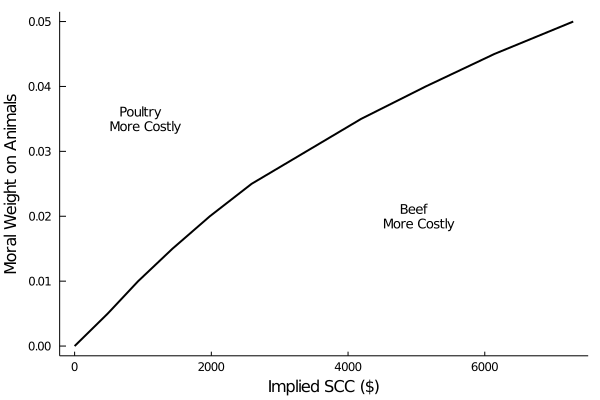

In [4]:
Figure5df = DataFrame(SCCs = [0; SCCs], Theta = [0; Thetas])
CSV.write(joinpath(output_directory, "Figure5.csv"), Figure5df)
plot([0; SCCs], [0; Thetas], label="", grid=false, legend=:topleft, linecolor=:black, linewidth=2, ylabel="Moral Weight on Animals", xlabel="Implied SCC (\$)")
annotate!([(5000, .02, Plots.text("Beef \n More Costly", 9, :black))])
annotate!([(1000, .035, Plots.text("Poultry \n More Costly", 9, :black))])

In [ ]:
include("SCW_AllResults.jl")

Ran once


┌ Warning: Assignment to `BeefPulse` in soft scope is ambiguous because a global variable by the same name exists: `BeefPulse` will be treated as a new local. Disambiguate by using `local BeefPulse` to suppress this warning or `global BeefPulse` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:56
┌ Warning: Assignment to `PorkPulse` in soft scope is ambiguous because a global variable by the same name exists: `PorkPulse` will be treated as a new local. Disambiguate by using `local PorkPulse` to suppress this warning or `global PorkPulse` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:57
┌ Warning: Assignment to `PoultryPulse` in soft scope is ambiguous because a global variable by the same name exists: `PoultryPulse` will be treated as a new local. Disambiguate by using `local PoultryPulse` to suppress this warning or `global PoultryPulse` to assig

Costs of Non-Veg in Baseline are 127211.04918032787


┌ Warning: Assignment to `BeefPulse` in soft scope is ambiguous because a global variable by the same name exists: `BeefPulse` will be treated as a new local. Disambiguate by using `local BeefPulse` to suppress this warning or `global BeefPulse` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:94
┌ Warning: Assignment to `PorkPulse` in soft scope is ambiguous because a global variable by the same name exists: `PorkPulse` will be treated as a new local. Disambiguate by using `local PorkPulse` to suppress this warning or `global PorkPulse` to assign to the existing global variable.
└ @ nothing C:\Users\Kevin\Documents\GitHub\DICEFARM\src\SCW_AllResults.jl:95
┌ Warning: Assignment to `PoultryPulse` in soft scope is ambiguous because a global variable by the same name exists: `PoultryPulse` will be treated as a new local. Disambiguate by using `local PoultryPulse` to suppress this warning or `global PoultryPulse` to assig

Costs of Beef in Baseline are 56.43793911007026
Costs of Pork in Baseline are 32.859484777517565
Costs of Poultry in Baseline are 326.0608899297424
Optimal Vegetarian Reduction is [0.4397876262785221]


In [8]:
include("SubRoutines_SCW//AnimalWelfareModel.jl")
include("SubRoutines_SCW//SCCs.jl")

Baseline SCC is 31.062029257611236
Ran once
Stern SCC is 246.5016615862069
Ran once
Growth Damage is 32.518197868852454
Ran once
Growth Damage + Stern 268.1369115862069


In [21]:
rho = .00001
dam_gama = 1.1*.00001
theta = .1
		m1  = create_AnimalWelfare()
		m2  = create_AnimalWelfare()
		update_param!(m1, :rho, rho)
		update_param!(m1, :dam_gama, dam_gama)
        update_param!(m1, :thetaB, theta)
        update_param!(m1, :thetaC, theta)
        update_param!(m1, :thetaP, theta)
		update_param!(m1, :Beef, Beef_serving_Pulse)
		update_param!(m2, :rho, rho)
		update_param!(m2, :dam_gama, dam_gama)
        update_param!(m2, :thetaB, theta)
        update_param!(m2, :thetaC, theta)
        update_param!(m2, :thetaP, theta)
		update_param!(m2, :Poultry, Poultry_serving_Pulse)
		run(m1)
		run(m2)
        m1[:welfare,:UTILITY]
        m2[:welfare, :UTILITY]
m1[:welfare, :UTILITY]/m2[:welfare,:UTILITY]

0.9999370766743158

0.9999948045111011

In [23]:
function opttest(x, grad)
	if length(grad)>0
	grad[1] = 1000
    grad[2] = 5
	end
	result = x[1]^2 - x[2]^2
	return result
end
opt = Opt(:LN_SBPLX, 2)
opt.lower_bounds=-1*ones(2)
opt.upper_bounds=ones(2)
init = [-.4; .6]
opt.xtol_rel = 1e-17
opt.max_objective = opttest
sol2 = optimize(opt, init)

(1.0, [1.0, 6.901154694927138e-9], :XTOL_REACHED)

In [37]:
 collect(0.1:.4:.9)

3-element Array{Float64,1}:
 0.1
 0.5
 0.9

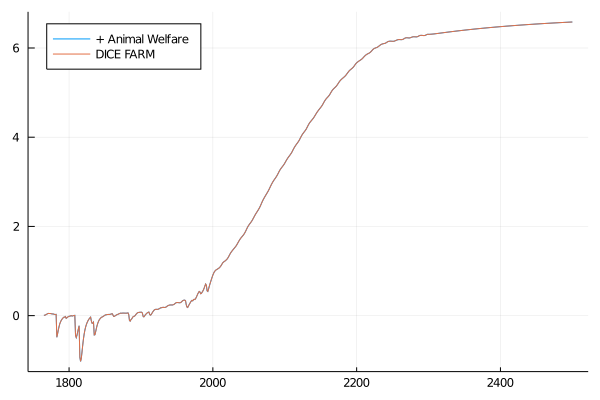

In [66]:
plot(collect(1765:1:2500), mm[:temperature, :T], label="+ Animal Welfare")
plot!(collect(1765:1:2500), m[:temperature, :T], label="DICE FARM", legend=:topleft)

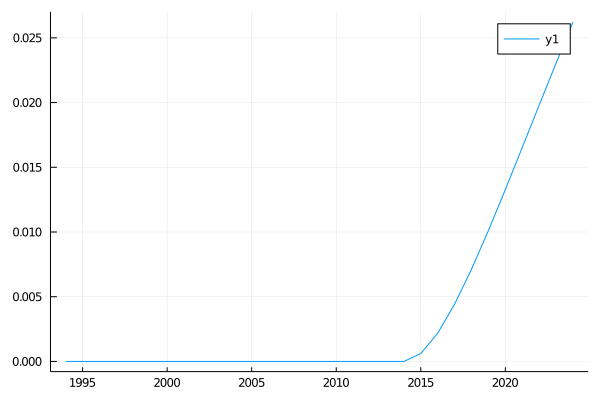

In [50]:
diff = m[:temperature, :T] - mm[:temperature, :T]
plot(collect(1765:1:2500)[230:260], diff[230:260])

In [58]:
testT = 200
t = collect(2010:1:2009+testT)
TFP = ones(testT)
TFP[1] = 5.115
gA= ones(testT)
gA[1] = 0.018
for i = 2:testT
    gA[i] = exp(-.006*(i-1))*gA[1]
    TFP[i] = TFP[i-1]/(1-gA[i-1])
end
[t TFP gA]

200×3 Array{Float64,2}:
 2010.0   5.115    0.018
 2011.0   5.20876  0.0178923
 2012.0   5.30365  0.0177853
 2013.0   5.39969  0.0176789
 2014.0   5.49687  0.0175731
 2015.0   5.59519  0.017468
 2016.0   5.69467  0.0173635
 2017.0   5.79529  0.0172597
 2018.0   5.89707  0.0171564
 2019.0   6.00001  0.0170538
 2020.0   6.10411  0.0169518
 2021.0   6.20937  0.0168504
 2022.0   6.31579  0.0167496
    ⋮              
 2198.0  39.6264   0.00582624
 2199.0  39.8586   0.00579139
 2200.0  40.0908   0.00575674
 2201.0  40.3229   0.00572231
 2202.0  40.555    0.00568807
 2203.0  40.787    0.00565405
 2204.0  41.0189   0.00562023
 2205.0  41.2507   0.0055866
 2206.0  41.4825   0.00555319
 2207.0  41.7141   0.00551997
 2208.0  41.9457   0.00548695
 2209.0  42.1771   0.00545412

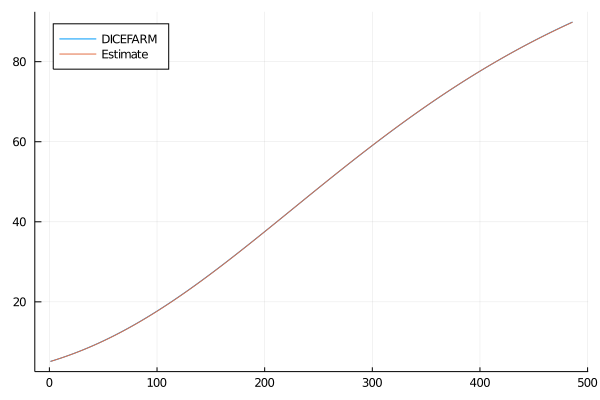

In [80]:

run(m)
DICEFARM_TFP = m[:grosseconomy, :AL][2015-1764:end]
function TFPestimates(x, grad)
	if length(grad)>0
	grad[1] = 1000
    grad[2] = 5
	end
    TFP    = ones(length(DICEFARM_TFP))
    TFP[1] = 5.115
    gA= ones(length(DICEFARM_TFP))
    gA[1] = x[1]
    for i = 2:length(gA)
        gA[i] = exp(x[2]*(i-1))*gA[1]
        TFP[i] = TFP[i-1]/(1-gA[i-1])
    end
	result = sum((DICEFARM_TFP - TFP).^2)
	return result
end
opt = Opt(:LN_SBPLX, 2)
opt.lower_bounds=[0.; -Inf]
opt.upper_bounds=[.02; 0.]
init = [.015; -.005]
opt.xtol_rel = 1e-17
opt.min_objective = TFPestimates
sol2 = optimize(opt, init)[2]
TFP    = ones(length(DICEFARM_TFP))
TFP[1] = 5.115
gA= ones(length(DICEFARM_TFP))
gA[1] = sol2[1]
for i = 2:length(gA)
     gA[i] = exp(sol2[2]*(i-1))*gA[1]
     TFP[i] = TFP[i-1]/(1-gA[i-1])
end


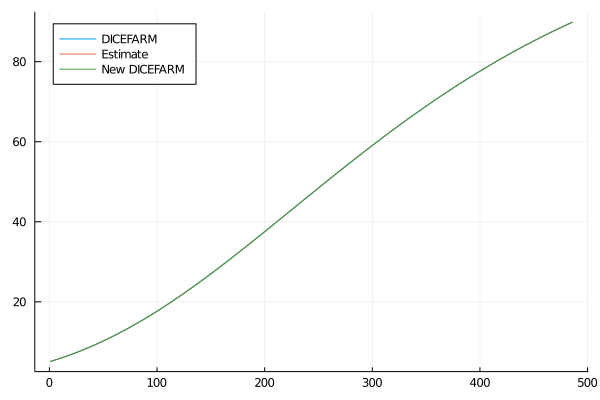

In [99]:
plot(DICEFARM_TFP, label="DICEFARM")
plot!(TFP, label="Estimate", legend=:topleft)
plot!(DICEFARM_TFP_2, label="New DICEFARM")

In [5]:
include("DICEFARM.jl")

create_dice_farm (generic function with 1 method)

In [6]:
m = create_dice_farm()

Mimi.Model
  Module: Mimi
  Components:
    ComponentId(Main.grosseconomy)
    ComponentId(Main.farm)
    ComponentId(Main.emissions)
    ComponentId(MimiFAIR.ch4_cycle)
    ComponentId(MimiFAIR.n2o_cycle)
    ComponentId(MimiFAIR.other_ghg_cycles)
    ComponentId(MimiFAIR.co2_cycle)
    ComponentId(MimiFAIR.ch4_rf)
    ComponentId(MimiFAIR.n2o_rf)
    ComponentId(MimiFAIR.other_ghg_rf)
    ComponentId(MimiFAIR.co2_rf)
    ComponentId(MimiFAIR.trop_o3_rf)
    ComponentId(MimiFAIR.strat_o3_rf)
    ComponentId(MimiFAIR.aerosol_direct_rf)
    ComponentId(MimiFAIR.aerosol_indirect_rf)
    ComponentId(MimiFAIR.bc_snow_rf)
    ComponentId(MimiFAIR.landuse_rf)
    ComponentId(MimiFAIR.contrails_rf)
    ComponentId(MimiFAIR.total_rf)
    ComponentId(MimiFAIR.temperature)
    ComponentId(Main.damages)
    ComponentId(Main.neteconomy)
    ComponentId(Main.welfare)
  Built: true


In [39]:
TwentyTwenty

256

In [ ]:
Thetas = collect(0.1:.4:.9)
SCCs   = zeros(length(Thetas))
Beef_serving_Pulse = copy(OrigBeef)
Beef_serving_Pulse[TwentyTwenty] = Beef_serving_Pulse[TwentyTwenty] + 100000*.02
Poultry_serving_Pulse = copy(OrigPoultry)
Poultry_serving_Pulse[TwentyTwenty] = Poultry_serving_Pulse[TwentyTwenty] + 100000*.02
rho = .015
a2  = .0023600
dam_gama = .0001
marg_welfare_diff = 0.
	while marg_welfare_diff<1.
		rho = 0.1*rho
		a2  = 1.02*a2
        dam_gama = 1.02*dam_gama
		m1  = create_AnimalWelfare()
		m2  = create_AnimalWelfare()
		update_param!(m1, :rho, rho)
		update_param!(m1, :a2, a2)
        update_param!(m1, :dam_gama, dam_gama)
        update_param!(m1, :thetaB, .05)
        update_param!(m1, :thetaP, .05)
        update_param!(m1, :thetaC, .05)
		update_param!(m1, :Beef, Beef_serving_Pulse)
		update_param!(m2, :rho, rho)
		update_param!(m2, :a2, a2)
        update_param!(m2, :dam_gama, dam_gama)
        update_param!(m2, :thetaB, .05)
        update_param!(m2, :thetaP, .05)
        update_param!(m2, :thetaC, .05)
		update_param!(m2, :Poultry, Poultry_serving_Pulse)
		run(m1)
		run(m2)
		marg_welfare_diff = m2[:welfare, :UTILITY]/m1[:welfare, :UTILITY]		
        print(marg_welfare_diff)
	end
	#Compute implied SCC for this combination
    print(rho, a2)
	base_welfare_for_scc = create_AnimalWelfare()
	update_param!(base_welfare_for_scc, :rho, rho)
	update_param!(base_welfare_for_scc, :a2, a2)
    update_param!(base_welfare_for_scc, :dam_gama, dam_gama)
	run(base_welfare_for_scc)
	marg_cons_for_scc   = create_AnimalWelfare()
	update_param!(marg_cons_for_scc, :rho, rho)
	update_param!(marg_cons_for_scc, :a2, a2)
    update_param!(marg_cons_for_scc, :dam_gama, dam_gama)
	update_param!(marg_cons_for_scc, :CEQ, 1e-9)
	run(marg_cons_for_scc)
	Co2_pulse_for_scc   = create_AnimalWelfare()
	update_param!(Co2_pulse_for_scc, :rho, rho)
	update_param!(Co2_pulse_for_scc, :a2, a2)
    update_param!(co2_pulse_for_scc, :dam_gama, dam_gama)
	update_param!(Co2_pulse_for_scc, :Co2Pulse, 1.)
	SCCs[i] = 1e-6*(base_welfare_for_scc[:welfare, :UTILITY] - Co2_pulse_for_scc[:welfare, :UTILITY])/(base_welfare_for_scc[:welfare, :UTILITY] - marg_cons_for_scc[:welfare, :UTILITY])
end
plot(SCCs, Thetas)

0.99999999999497660.99999999999648730.9999999999966260.99999999999664480.99999999999664750.99999999999666270.9999999999966670.99999999999667480.99999999999668410.99999999999669180.9999999999966970.99999999999670620.99999999999671430.99999999999672350.9999999999967310.99999999999673890.99999999999674770.99999999999675690.99999999999676470.99999999999677350.99999999999678510.99999999999679630.9999999999968050.99999999999681120.99999999999682410.99999999999683230.9999999999968470.99999999999685550.99999999999686620.99999999999688740.99999999999689740.99999999999690560.99999999999692050.99999999999693320.99999999999694840.99999999999695890.99999999999697220.99999999999698740.9999999999970010.99999999999702040.99999999999703150.99999999999705010.99999999999706020.99999999999707430.999999999997080.99999999999710910.99999999999712760.99999999999712190.99999999999713860.99999999999717580.99999999999719150.99999999999721890.99999999999724430.99999999999725110.99999999999726260.99999999999729120

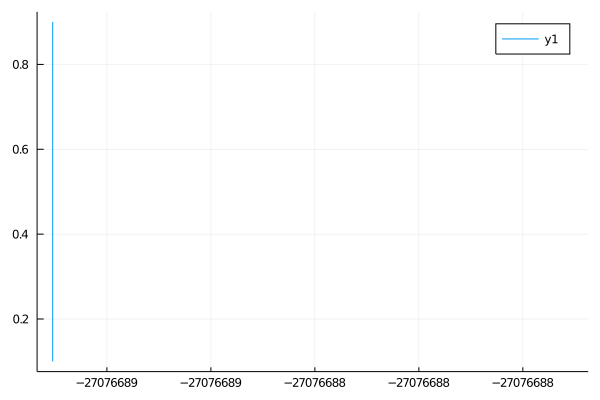

In [43]:
plot(SCCs, Thetas)